<a href="https://colab.research.google.com/github/jkworldchampion/Military_CodingStudy/blob/main/Dacon/BaseLine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 해당 폴더로 이동

In [ ]:
cd /content/drive/MyDrive/Colab_Notebooks/Machine_learning/Dacon/Solar_Energy

/content/drive/MyDrive/Colab_Notebooks/Machine_learning/Dacon/Solar_Energy


# 2. EDA(탐색적 데이터 분석)

In [ ]:
import pandas as pd

In [ ]:
# 데이터를 가져온다
site_info = pd.read_csv("data/site_info.csv")  # 발전소의 위치정보
dangjin_fcst_data = pd.read_csv("data/dangjin_fcst_data.csv")  # 당진 발전소 동네 예보
dangjin_obs_data = pd.read_csv("data/dangjin_obs_data.csv")  # 당진 발전소 관측 정보
ulsan_fcst_data = pd.read_csv("data/ulsan_fcst_data.csv")
ulsan_obs_data = pd.read_csv("data/ulsan_obs_data.csv")
energy_data = pd.read_csv("data/energy.csv")  # 발전량 관측값 

In [ ]:
site_info.head(5)

,Id,Capacity,Address,InstallationAngle,IncidentAngle,Latitude,Longitude
0,당진수상태양광,1.0,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
1,당진자재창고태양광,0.7,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
2,당진태양광,1.0,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
3,울산태양광,0.5,울산광역시 남구 용잠로 623,20.0,20.0,35.477651,129.380778


In [ ]:
dangjin_fcst_data.head(5)   # 2018-03-01 11:00:00  forecast 4.0  => 11시에 예측한 2018-03-01 15:00:00의 기상

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 11:00:00,7.0,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 11:00:00,10.0,-2.0,60.0,6.7,323.0,1.0
3,2018-03-01 11:00:00,13.0,-2.0,55.0,6.7,336.0,1.0
4,2018-03-01 11:00:00,16.0,-4.0,55.0,5.5,339.0,1.0


In [ ]:
dangjin_obs_data.head(5)

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-01 00:00,3.1,3.6,340.0,96.0,NaN
1,129,서산,2018-03-01 01:00,2.8,0.7,140.0,97.0,NaN
2,129,서산,2018-03-01 02:00,2.6,3.2,320.0,95.0,NaN
3,129,서산,2018-03-01 03:00,2.0,1.9,230.0,97.0,NaN
4,129,서산,2018-03-01 04:00,2.2,2.1,180.0,97.0,NaN


In [ ]:
energy_data.head(10)

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 1:00:00,0.0,0.0,0,0
1,2018-03-01 2:00:00,0.0,0.0,0,0
2,2018-03-01 3:00:00,0.0,0.0,0,0
3,2018-03-01 4:00:00,0.0,0.0,0,0
4,2018-03-01 5:00:00,0.0,0.0,0,0
5,2018-03-01 6:00:00,0.0,0.0,0,0
6,2018-03-01 7:00:00,0.0,0.0,0,0
7,2018-03-01 8:00:00,0.0,0.0,0,4
8,2018-03-01 9:00:00,36.0,33.0,37,35
9,2018-03-01 10:00:00,313.0,209.0,318,71


## 에너지를 중점적으로 살펴보자

In [ ]:
import matplotlib.pyplot as plt

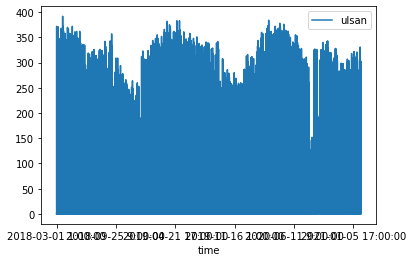

In [ ]:
ax = plt.gca()
energy_data.plot(kind = 'line', x = 'time', y = 'ulsan', ax = ax)  # 시간대를 나눠서 살펴보자

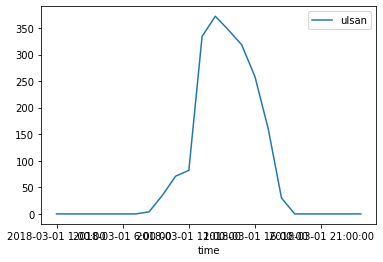

In [ ]:
type(energy_data['time'])  # pandas.core.series.Series
ax = plt.gca()
energy_data.head(24).plot(kind = 'line', x = 'time', y = 'ulsan', ax = ax)
plt.show()

In [ ]:
import plotly.express as px   # plotly도 많이 쓰이는 듯
fig = px.line(energy_data[:24*7], x='time', y=['dangjin_floating','dangjin_warehouse','dangjin','ulsan'])  # 7일 간의 발전량을 살펴본다.
fig.show()

In [ ]:
# 월별과 시간별로 묶음
energy_data['month'] = energy_data['time'].dt.month
energy_data['hour'] = energy_data['time'].dt.hour

AttributeError: ignored